**PROJECT 2 :** `Data-Driven Perspectives on a New Film Studio`.

**INSTRUCTOR:** `Samuel Karu`

**STUDENT NAMES:** 

1 Dennis Muriungi - dennis.muriungi2@student.moringaschool.com

2 Jasho kiplangat - jasho.kiplangat@student.moringaschool.com

3 Shem Omondi - shem.omondi@student.moringaschool.com

4 Valary Kones - valary.kones@student.moringaschool.com

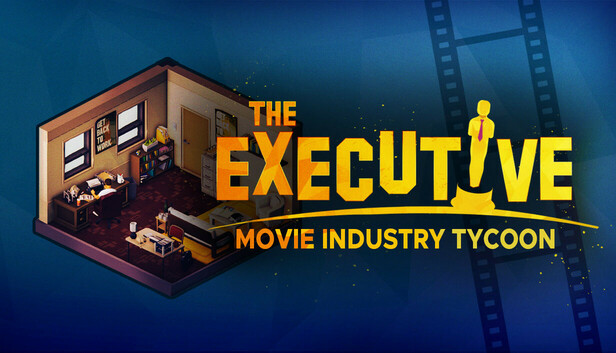

In [1]:
from IPython.display import Image, display
display(Image(filename="..\output\Tycoon.jpg", width= 700))

**Data-Driven Perspectives on a New Film Studio**

**1. Business Issue**

 Despite having no prior film production experience, the business is starting a new film studio.  The studio must comprehend what makes movies successful, whether as determined by audience ratings, critical reception, or financial performance, in order to make well-informed judgments about which films to create.  Finding the traits that consistently result in greater success across various audiences and platforms is the main problem.


**2. Business Goal**

 Determine the most important connections between a film's genre, budget, and ratings and its financial results to help with data-driven funding and production choices.


**3. Research Questions**

1. How do different genres perform according to ratings?

2. How do different genres perform according to profitability?

3. How do production budgets relate to box office revenue?


**4. Data Understanding**
We are working with the following datasets:

1 IM.db (movie ratings, genres, runtimes)

2 Movie_gross (revenue, release info)

3 Rotten Tomatoes (Audience scores)

4 Movie_budget (Financial Perfomance)

5 Movie_info (ratings, watchtime)

6 Reviews (Reviews)

**5. Data Analysis**

In [2]:
#importing necessary libraries
import pandas as pd
import sqlite3
import os

In [3]:
# CSV files
movie_gross = pd.read_csv("../data/bom.movie_gross.csv")
movie_budgets = pd.read_csv("../data/tn.movie_budgets.csv")
movies = pd.read_csv("../data/tmdb.movies.csv")

# TSV files
movie_info = pd.read_csv("../data/rt.movie_info.tsv", sep='\t')
reviews = pd.read_csv("../data/rt.reviews.tsv", sep='\t', encoding='latin1') 

# DATABASE File
conn = sqlite3.connect("../data/im.db")

In [4]:
movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [5]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [6]:
ratings = pd.read_sql(''' 
SELECT *
    FROM movie_ratings;
''', conn)
ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


**6 Data Cleaning**

In [7]:
# 1 Rename 'title' in movies to match 'movie' in movie_budgets
movies.rename(columns={"title": "movie"}, inplace=True)

# 2 Check columns before merging
print("Movie Budgets columns:", movie_budgets.columns)
print("Movies columns:", movies.columns)
print("Ratings columns:", ratings.columns)

# 3 Merge budgets and movies on 'movie' column
merged_df = movie_budgets.merge(movies, on="movie", how="left")


# 4 Merge ratings
#   - merged_df: use 'id' from movies
#   - ratings: use 'movie_id'
if "id" in merged_df.columns and "movie_id" in ratings.columns:
    merged_df = merged_df.merge(ratings, left_on="id", right_on="movie_id", how="left")
else:
    print("Check ID columns! 'id' or 'movie_id' missing.")

# 5 drop duplicate columns if any
merged_df = merged_df.loc[:,~merged_df.columns.duplicated()]

# 6 Quick check of final dataframe
print(merged_df.head())
print("Final columns:", merged_df.columns)


Movie Budgets columns: Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')
Movies columns: Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'movie', 'vote_average', 'vote_count'],
      dtype='object')
Ratings columns: Index(['movie_id', 'averagerating', 'numvotes'], dtype='object')
Check ID columns! 'id' or 'movie_id' missing.
   id_x release_date_x                                        movie  \
0     1   Dec 18, 2009                                       Avatar   
1     2   May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2     3    Jun 7, 2019                                 Dark Phoenix   
3     4    May 1, 2015                      Avengers: Age of Ultron   
4     5   Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   

  production_budget domestic_gross worldwide_gross  Unnamed: 0  \
0      $425,000,000   $760,507,625  

In [8]:
merged_df.head(10)

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,Unnamed: 0,genre_ids,id_y,original_language,original_title,popularity,release_date_y,vote_average,vote_count
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",6.0,"[28, 12, 14, 878]",19995.0,en,Avatar,26.526,2009-12-18,7.4,18676.0
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2470.0,"[12, 28, 14]",1865.0,en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,6.4,8571.0
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",14169.0,"[28, 12, 878]",99861.0,en,Avengers: Age of Ultron,44.383,2015-05-01,7.3,13457.0
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",23811.0,"[12, 28, 14]",299536.0,en,Avengers: Infinity War,80.773,2018-04-27,8.3,13948.0
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209",20623.0,"[28, 12, 14, 878]",141052.0,en,Justice League,34.953,2017-11-17,6.2,7510.0
9,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209",23830.0,"[28, 12, 14, 878]",141052.0,en,Justice League,34.953,2017-11-17,6.2,7510.0


In [9]:
merged_df.drop(columns=["Unnamed: 0"], inplace=True)

**Converting money columns to numeric**

In [10]:
#convert $ strings to numbers
def money_to_num(x):
    if isinstance(x, str):
        return float(x.replace('$','').replace(',',''))
    return x

for col in ['production_budget', 'domestic_gross', 'worldwide_gross']:
    merged_df[col] = merged_df[col].apply(money_to_num)


**Calculating Profitability**

In [11]:
merged_df['profitability'] = (merged_df['worldwide_gross'] - merged_df['production_budget']) / merged_df['production_budget']

**Mapping Genre Ids to names**

In [12]:
genre_dict = {
    28: 'Action',
    12: 'Adventure',
    16: 'Animation',
    35: 'Comedy',
    80: 'Crime',
    99: 'Documentary',
    18: 'Drama',
    10751: 'Family',
    14: 'Fantasy',
    36: 'History',
    27: 'Horror',
    10402: 'Music',
    9648: 'Mystery',
    10749: 'Romance',
    878: 'Sci-Fi',
    10770: 'TV Movie',
    53: 'Thriller',
    10752: 'War',
    37: 'Western'
}

# Convert genre_ids list to genre names (take first genre for simplicity)
import ast

def get_first_genre(x):
    try:
        if isinstance(x, str):
            x = ast.literal_eval(x)  # convert string list to Python list
        if isinstance(x, list) and len(x) > 0:
            return genre_dict.get(x[0], 'Other')
    except:
        return 'Other'
    return 'Other'

merged_df['main_genre'] = merged_df['genre_ids'].apply(get_first_genre)


**7. Data Visualization**

**Research questions:**

**A. How do different genres perform according to ratings?**

In [13]:
ratings_by_genre = merged_df.groupby('main_genre')['vote_average'].mean().sort_values(ascending=False)
print("Average Ratings by Genre:\n", ratings_by_genre)

Average Ratings by Genre:
 main_genre
History        6.858824
Music          6.723077
Documentary    6.662821
War            6.623529
Drama          6.543121
Romance        6.454237
Animation      6.377922
Adventure      6.348062
Crime          6.261224
Family         6.223333
Fantasy        6.168750
Action         6.154802
Comedy         6.131944
Sci-Fi         6.115517
Mystery        6.048387
Thriller       5.668824
Other          5.538462
Horror         5.511932
Western        5.466667
TV Movie       4.866667
Name: vote_average, dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_10940\3940441670.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ratings_by_genre.index, y=ratings_by_genre.values, palette="viridis")


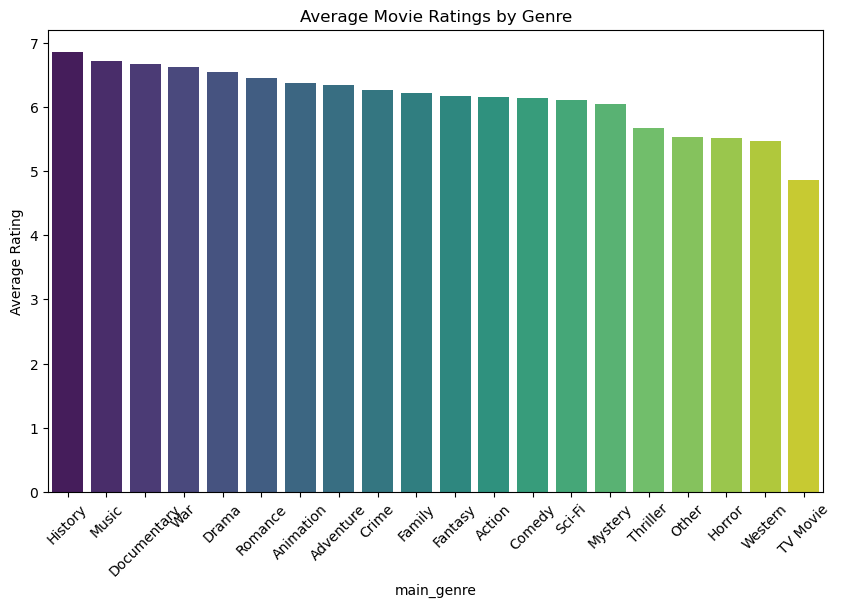

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x=ratings_by_genre.index, y=ratings_by_genre.values, palette="viridis")
plt.xticks(rotation=45)
plt.ylabel("Average Rating")
plt.title("Average Movie Ratings by Genre")
plt.show()



`Ratings by genre:` TV movies and western films receive the lowest average ratings, while history and music films have the highest.

**B. How do different genres perform according to profitability?**

In [15]:
profit_by_genre = merged_df.groupby('main_genre')['profitability'].mean().sort_values(ascending=False)
print("Average Profitability by Genre:\n", profit_by_genre)

Average Profitability by Genre:
 main_genre
Horror         10.574791
Family          5.800836
Fantasy         5.327602
Mystery         4.923542
Other           4.245301
Sci-Fi          4.129767
Romance         4.067000
Thriller        3.466004
Animation       3.170534
Drama           2.912721
Comedy          2.287971
History         2.061072
Action          1.939035
Adventure       1.821447
Documentary     1.337210
War             1.228323
Crime           1.172704
TV Movie        1.038109
Music           0.535898
Western         0.414509
Name: profitability, dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_10940\1800736617.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=profit_by_genre.index, y=profit_by_genre.values, palette="coolwarm")


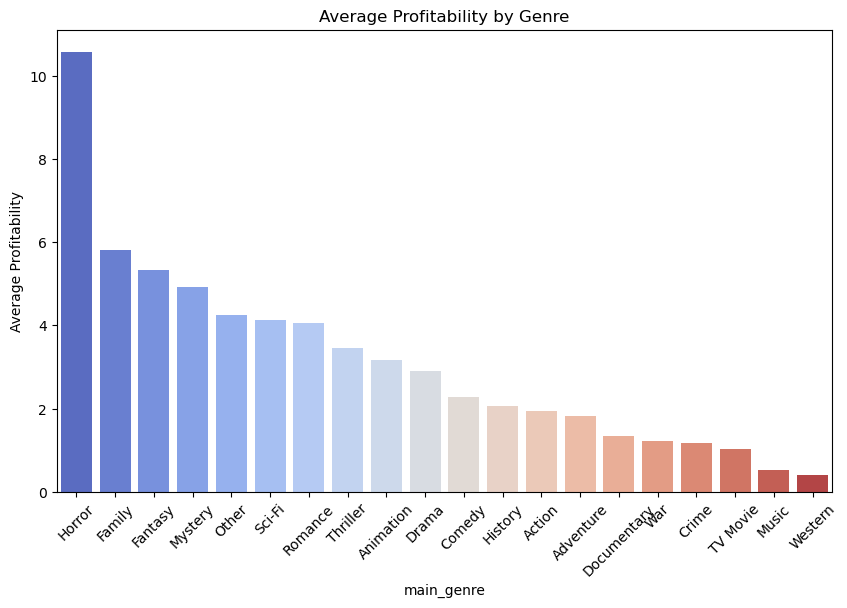

In [16]:
plt.figure(figsize=(10,6))
sns.barplot(x=profit_by_genre.index, y=profit_by_genre.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.ylabel("Average Profitability")
plt.title("Average Profitability by Genre")
plt.show()


`Profitability by genre:` Despite high ratings, Music and western have lower average profitability, whereas Horror and Family are typically the most successful genres.

**C. How do production budgets relate to box office revenue?**

Correlation between Production Budget and Worldwide Gross: 0.7515286939073935


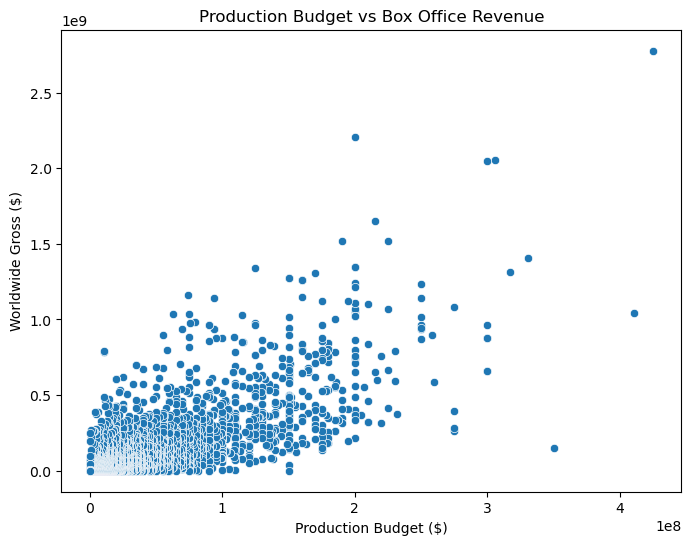

In [17]:
# Correlation
corr = merged_df['production_budget'].corr(merged_df['worldwide_gross'])
print("Correlation between Production Budget and Worldwide Gross:", corr)

# Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x='production_budget', y='worldwide_gross', data=merged_df)
plt.xlabel("Production Budget ($)")
plt.ylabel("Worldwide Gross ($)")
plt.title("Production Budget vs Box Office Revenue")
plt.show()


`Production budget versus revenue:` There is a substantial positive association between production budget and worldwide gross, implying that higher-budget films earn more, albeit not always correspondingly lucrative.

**7. Recommendations**


**A. How do different genres perform according to ratings?**

Focus on the Adventure and Family categories for more profitability, especially when working with a limited budget.


**B. How do different genres perform according to profitability?**

 Invest selectively in Action and Sci-Fi, ensuring that marketing and distribution maximize revenue, as these genres do well in ratings but not always in profitability.


**c. How do production budgets relate to box office revenue?**

 High-budget films should be carefully evaluated; while they can generate significant box office income, the ROI may be lower, therefore risk management is critical.

**Conclusion**

The findings indicate that movie performance varies greatly by genre and budget.  While action and sci-fi films are popular with moviegoers, adventure and family films perform better financially.  Furthermore, larger production budgets are typically connected with higher box office income, although this does not always convert into proportional profitability.  As a result, deliberate investment in genres with high profit potential, combined with careful budgeting for high-cost productions, is critical to optimizing audience enjoyment and financial returns.